In [9]:
from sympy import *

----
# Calculo do R0

In [19]:
ds = -beta*S*(I+A+r*(Iq+Aq))
dsq = -r*beta*S*(I+A+r*(Iq+Aq))
de = beta*S*(I+A+r*(Iq+Aq))-rho*zeta*E-tau*E
deq = beta*Sq*(I+A+r*(Iq+Aq))-rho*zeta*Eq-tau*Eq
di = tau*E-sigma*I-rho*I
diq = tau*Eq-sigma*Iq-rho*Iq 
da = alpha*sigma*I-rho*A-lambd1*A
daq = alpha*sigma*Iq-rho*Aq-lambd1*Aq
dq = sigma*(1-alpha)*(I+Iq)+rho*(zeta*(E+Eq)+I+Iq+A+Aq)-lambd2*Q-mu*Q
dr = lambd1*(A+Aq)+lambd2*Q
dd = mu*Q

In [751]:
solve([ds, dsq, de, deq, di, diq, da, daq, dq, dr, dd],(S, E, I, A, Q, R, D, Sq, Eq, Iq, Aq))

[(0, 0, 0, 0, 0, R, D, Sq, 0, 0, 0), (S, 0, 0, 0, 0, R, D, Sq, 0, 0, 0)]

In [752]:
F = Matrix([ds, dsq, de, deq, di, diq, da, daq, dq, dr, dd])
M = F.jacobian([S, Sq, E, Eq, I, Iq, A, Aq, Q, R, D])
M

Matrix([
[  -beta*(A + I + r*(Aq + Iq)),                          0,               0,               0,                 -S*beta,               -S*beta*r,       -S*beta,     -S*beta*r,           0, 0, 0],
[-beta*r*(A + I + r*(Aq + Iq)),                          0,               0,               0,               -S*beta*r,            -S*beta*r**2,     -S*beta*r,  -S*beta*r**2,           0, 0, 0],
[   beta*(A + I + r*(Aq + Iq)),                          0, -rho*zeta - tau,               0,                  S*beta,                S*beta*r,        S*beta,      S*beta*r,           0, 0, 0],
[                            0, beta*(A + I + r*(Aq + Iq)),               0, -rho*zeta - tau,                 Sq*beta,               Sq*beta*r,       Sq*beta,     Sq*beta*r,           0, 0, 0],
[                            0,                          0,             tau,               0,            -rho - sigma,                       0,             0,             0,           0, 0, 0],
[                    

In [753]:
E,Eq,I,Iq,A,Aq,Q,

(E, Eq, I, Iq, A, Aq, Q)

In [754]:
F_cal = Matrix([ds, dsq, 0, 0, alpha*sigma*I, alpha*sigma*Iq, rho*(I+Iq+A+Aq)+sigma*(1-alpha)*(I+Iq)])
F_cal

Matrix([
[                     -S*beta*(A + I + r*(Aq + Iq))],
[                   -S*beta*r*(A + I + r*(Aq + Iq))],
[                                                 0],
[                                                 0],
[                                     I*alpha*sigma],
[                                    Iq*alpha*sigma],
[rho*(A + Aq + I + Iq) + sigma*(1 - alpha)*(I + Iq)]])

In [755]:
V_cal_neg = Matrix([[E*(rho*zeta+tau)],[Eq*(rho*zeta+tau)],[I*(rho+sigma)],[Iq*(rho+sigma)],[A*(rho+lambd1)],[Aq*(rho+lambd1)],[Q*(lambd2+mu)]])
V_cal_neg

Matrix([
[ E*(rho*zeta + tau)],
[Eq*(rho*zeta + tau)],
[    I*(rho + sigma)],
[   Iq*(rho + sigma)],
[   A*(lambda + rho)],
[  Aq*(lambda + rho)],
[     Q*(gamma + mu)]])

In [756]:
V_cal_pos = Matrix([[0],[0],[tau*E],[tau*Eq],[0],[0],[rho*(zeta*(E+Eq))]])
V_cal_pos

Matrix([
[                0],
[                0],
[            E*tau],
[           Eq*tau],
[                0],
[                0],
[rho*zeta*(E + Eq)]])

In [757]:
V_cal = V_cal_neg-V_cal_pos
V_cal

Matrix([
[                E*(rho*zeta + tau)],
[               Eq*(rho*zeta + tau)],
[          -E*tau + I*(rho + sigma)],
[        -Eq*tau + Iq*(rho + sigma)],
[                  A*(lambda + rho)],
[                 Aq*(lambda + rho)],
[Q*(gamma + mu) - rho*zeta*(E + Eq)]])

In [758]:
F = F_cal.jacobian([E,Eq,I,Iq,A,Aq,Q]).subs([(S,1)])
F

Matrix([
[0, 0,                   -beta,                 -beta*r,   -beta,    -beta*r, 0],
[0, 0,                 -beta*r,              -beta*r**2, -beta*r, -beta*r**2, 0],
[0, 0,                       0,                       0,       0,          0, 0],
[0, 0,                       0,                       0,       0,          0, 0],
[0, 0,             alpha*sigma,                       0,       0,          0, 0],
[0, 0,                       0,             alpha*sigma,       0,          0, 0],
[0, 0, rho + sigma*(1 - alpha), rho + sigma*(1 - alpha),     rho,        rho, 0]])

In [759]:
V = V_cal.jacobian([E,Eq,I,Iq,A,Aq,Q]).subs([(S,1)])
V

Matrix([
[rho*zeta + tau,              0,           0,           0,            0,            0,          0],
[             0, rho*zeta + tau,           0,           0,            0,            0,          0],
[          -tau,              0, rho + sigma,           0,            0,            0,          0],
[             0,           -tau,           0, rho + sigma,            0,            0,          0],
[             0,              0,           0,           0, lambda + rho,            0,          0],
[             0,              0,           0,           0,            0, lambda + rho,          0],
[     -rho*zeta,      -rho*zeta,           0,           0,            0,            0, gamma + mu]])

In [760]:
M = F*(V.inv())
M

Matrix([
[                    -beta*tau/((rho + sigma)*(rho*zeta + tau)),                   -beta*r*tau/((rho + sigma)*(rho*zeta + tau)),                     -beta/(rho + sigma),                   -beta*r/(rho + sigma),   -beta/(lambda + rho),    -beta*r/(lambda + rho), 0],
[                  -beta*r*tau/((rho + sigma)*(rho*zeta + tau)),                -beta*r**2*tau/((rho + sigma)*(rho*zeta + tau)),                   -beta*r/(rho + sigma),                -beta*r**2/(rho + sigma), -beta*r/(lambda + rho), -beta*r**2/(lambda + rho), 0],
[                                                             0,                                                              0,                                       0,                                       0,                      0,                         0, 0],
[                                                             0,                                                              0,                                       0,                        

In [1]:
R0 = list(M.eigenvals())[0]


NameError: name 'M' is not defined

---

# Simulação do Modelo

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
%matplotlib inline
plt.style.use('ggplot')


In [2]:
def model(y,t,tau, sigma, alpha, lambd1, lambd2, mu, zeta, beta, r, rho, p):

  
    S, Sq, E, Eq, I, Iq, A, Aq, Q, R, D = y  
    
    
    return [
        -beta*S*(I+A+r*(Iq+Aq)),
        -r*beta*Sq*(I+A+r*(Iq+Aq)),
        beta*S*(I+A+r*(Iq+Aq))-rho*zeta*E-tau*E,
        beta*S*(I+A+r*(Iq+Aq))-rho*zeta*Eq-tau*Eq,
        tau*E-sigma*I-rho*I,
        tau*Eq-sigma*Iq-rho*Iq,
        alpha*sigma*I-rho*A-lambd1*A,
        alpha*sigma*Iq-rho*Aq-lambd1*Aq,
        sigma*(1-alpha)*(I+Iq)+rho*(zeta*(E+Eq)+I+Iq+A+Aq)-lambd2*Q-mu*Q,
        lambd1*(A+Aq)+lambd2*Q,
        mu*Q
           ]

def simula(modelo, y0, t, params):
    
    S = 1 - np.sum(y0)
    y0.insert(0,1 - np.sum(y0))
    
    return odeint(modelo,y0,t,args = params)

def residual(params,t,data):
    sol = simula(model,y0,t,args = params)
    return (sol - data).ravel()   

In [3]:
tau = 1/3
sigma = 0.5
alpha = 0.6
lambd1 = 1/8
lambd2 = 1/16
mu = 0.05
zeta = 1
beta = 0.8
r = 0.5
rho = 0.05
p = 0.4

y0 = [0.74,0.24,0.01,0.01,0,0,0,0,0,0,0]
params = (tau, sigma, alpha, lambd1, lambd2, mu, zeta, beta, r, rho, p)

In [4]:
sol = simula(model,[0.2,0.01,0.01,0,0,0,0,0,0,0], np.arange(0, 300, 1), params)

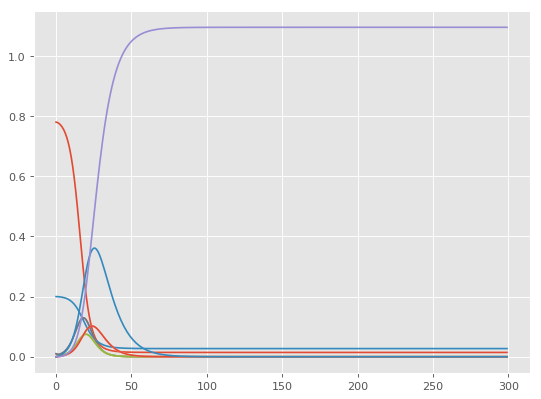

In [29]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

for i in range(10):
    plt.plot(sol[:,i])
    
plt.show()


---
# Analise de sensibilidade

In [5]:
from multiprocessing import Pool
from SALib.sample import saltelli
from SALib.analyze import sobol
from tqdm import tqdm
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [6]:
problem = {
    'num_vars': 11,
    'names': ["tau", "sigma", "alpha", "lambd1", "lambd2", "mu", "zeta", "beta", "r", "rho", "p"],
    'bounds': [[0,2],[0,2],[0,1],[0,1],[0,1],[0,3],
              [0,1],[0,3],[0,1],[0,3],[0,1]]
}

#tau = 1/3
#sigma = 0.5
#alpha = 0.6
#lambd1 = 1/8
#lambd2 = 1/16
#mu = 0.05
#zeta = 1
#beta = 0.6
#r = 0.5
#rho = 0.1
#p = 0.4

In [7]:
param_values = saltelli.sample(problem, 1000)
param_values.shape

(24000, 11)

In [34]:
def anal_sens(params):
    sol = simulação(model,[0.2,0.01,0.01,0,0,0,0,0,0,0], np.arange(0, 300, 1), params)
    return max(sol[:,5])

In [36]:
Y = np.empty(param_values.shape[0])
for i in tqdm(range(len(Y))):
    sol = simula(model,[0.2,0.01,0.01,0,0,0,0,0,0,0], np.arange(0, 200, 1), tuple(param_values[i]))
    Y[i] = max(sol[:,5])

100%|██████████| 24000/24000 [01:23<00:00, 286.51it/s]


In [37]:
Si = sobol.analyze(problem,Y, print_to_console=False)

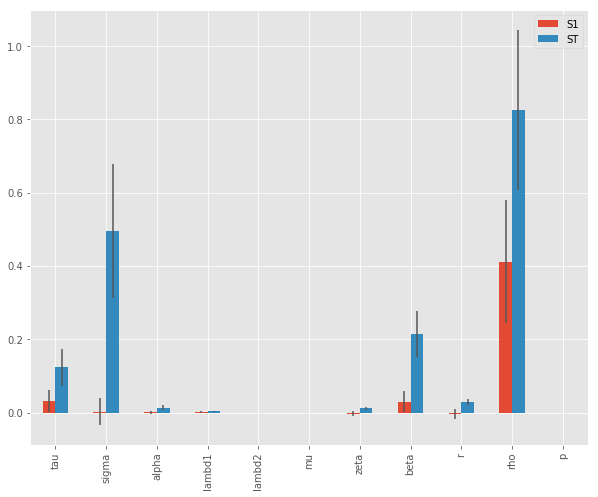

In [38]:
def plot_sobol(si,prob, order=1):
    Si_filter = {k:si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(Si_filter, index=problem['names'])
    fig, ax = plt.subplots(1, figsize=(10,8))

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    
plot_sobol(Si,problem)

----
# Estimação bayesiana dos parâmetros.

In [43]:
import sherpa 

In [41]:
df = pd.read_csv("COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv")
df
pop_size = 18804000
temp = len(df)

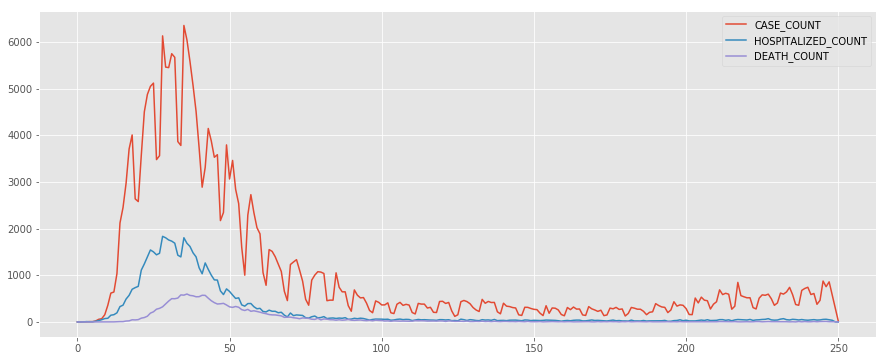

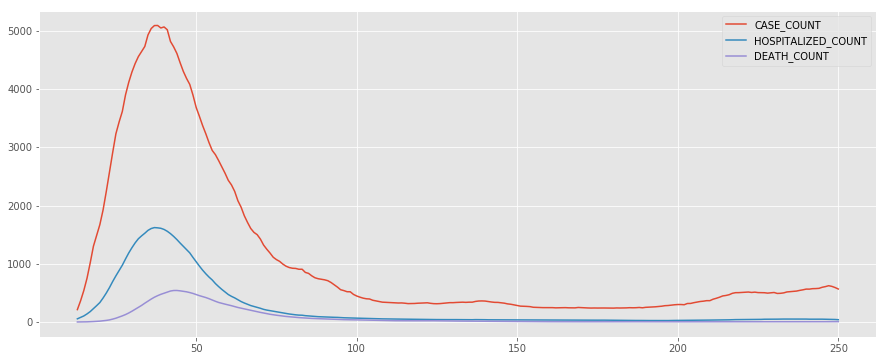

In [42]:
df.plot(figsize=(15, 6))
df.rolling(14).mean().plot(figsize=(15,6))

In [96]:
#tau = 1/3
#sigma = 0.5
#alpha = 0.6
#lambd1 = 1/8
#lambd2 = 1/16
#mu = 0.05
#zeta = 1
#beta = 0.6
#r = 0.5
#rho = 0.1
#p = 0.4

parameters = [
    sherpa.Continuous(name='tau',range=[0.01,0.8]),
    sherpa.Continuous(name='sigma',range=[0.001,1]),
    sherpa.Continuous(name='alpha',range=[0.001,1]),
    sherpa.Continuous(name='lambd1',range=[0.0001,0.5]),
    sherpa.Continuous(name='lambd2',range=[0.0001,0.5]),
    sherpa.Continuous(name='mu',range=[0.0001,0.01]),
    sherpa.Continuous(name='zeta',range=[0.5,1]),
    sherpa.Continuous(name='beta',range=[0.001,1]),
    sherpa.Continuous(name='r',range=[0.2,1]),
    sherpa.Discrete(name='rho',range=[0,1]),
    sherpa.Discrete(name='p',range=[0,1]),
    sherpa.Discrete(name='t0',range=[0,25]),
]

algorithm = sherpa.algorithms.RandomSearch(max_num_trials=1000)
# algorithm = sherpa.algorithms.GPyOpt(model_type='GP',max_num_trials=150)

In [44]:
parms = Parameters()
params.add('')

In [97]:
study = sherpa.Study(parameters=parameters,
                     algorithm=algorithm,
                     lower_is_better=True,
                     disable_dashboard=True)

In [98]:
If = sol[:,4]+sol[:,5]

for trial in study:
    pars = [trial.parameters[n] for n in ['tau', 'sigma', 'alpha', 'lambd1', 'lambd2', 'mu', 'zeta', 'beta', 'r', 'rho', 'p']]
    t0 = trial.parameters['t0']
    I = If[:temp+t0]*pop_size
    loss = sum((df.CASE_COUNT-I[t0:t0+temp])**2)
    study.add_observation(trial=trial,objective=loss)
    study.finalize(trial)

In [99]:
res = study.get_best_result()
res

{'Trial-ID': 53,
 'Iteration': 1,
 'alpha': 0.866597827772839,
 'beta': 0.43976867032271866,
 'lambd1': 0.4959439870895805,
 'lambd2': 0.33349503459867263,
 'mu': 0.009373228842645364,
 'p': 0,
 'r': 0.5503474820116347,
 'rho': 0,
 'sigma': 0.6463318528323735,
 't0': 24,
 'tau': 0.698000854778198,
 'zeta': 0.6827064261073308,
 'Objective': 18577895387090.734}

In [100]:
op_params = (res['tau'],
             res['sigma'],
             res['alpha'],
             res['lambd1'],
             res['lambd2'],
             res['mu'],
             res['zeta'],
             res['beta'],
             res['r'],
             res['rho'],
             res['p'])


In [101]:
op_sol = simulação(model,[0.2,0.01,0.01,0,0,0,0,0,0,0], np.arange(0, 300, 1), op_params)

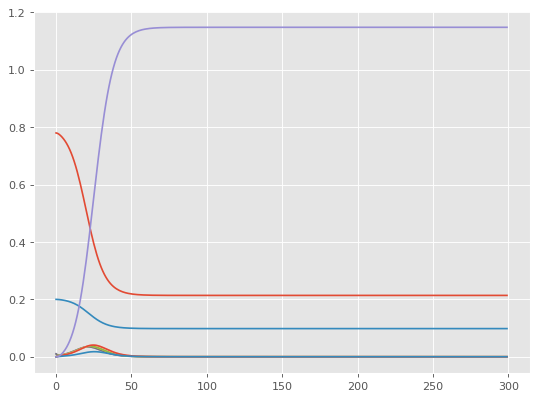

In [112]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

for i in range(10):
    plt.plot(op_sol[:,i])


plt.show()

In [5]:
from lmfit import minimize, Parameters, Parameter, report_fit

In [ ]:
def residual(ps, ts, dados):
    

In [17]:
a = np.array([[1,1],[1,1]])
np.random.normal(size= a.shape)

array([[0.08420366, 0.22514314],
       [1.46176587, 0.36043516]])

In [78]:
def f(xs, t, ps):
    """Lotka-Volterra predator-prey model."""
    try:
        a = ps['a'].value
        b = ps['b'].value
        c = ps['c'].value
        d = ps['d'].value
    except:
        a, b, c, d = ps

    x, y = xs
    return [a*x - b*x*y, c*x*y - d*y]

def g(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args= (ps,))
    return x

def residual(ps, ts, data):
    x0 = ps['x0'].value, ps['y0'].value
    model = g(ts, x0, ps)
    return (model - data).ravel()


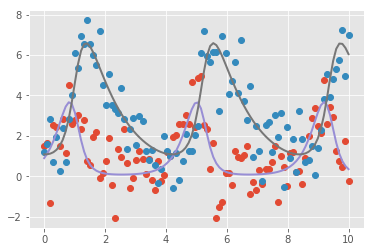

In [99]:
t = np.linspace(0, 10, 100)
x0 = np.array([1,1])

a, b, c, d = 3,1,1,1
true_params = np.array((a, b, c, d))
data = g(t, x0, true_params)
data += np.random.normal(size=data.shape)

# set parameters incluing bounds
params = Parameters()
params.add('x0', value= float(data[0, 0]), min=0, max=10)
params.add('y0', value=float(data[0, 1]), min=0, max=10)
params.add('a', value=2.0, min=0, max=10)
params.add('b', value=1.0, min=0, max=10)
params.add('c', value=1.0, min=0, max=10)
params.add('d', value=1.0, min=0, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq')
final = data + result.residual.reshape(data.shape)

# plot data and fitted curves
plt.plot(t, data, 'o')
plt.plot(t, final, '-', linewidth=2);

In [87]:
params

name,value,initial value,min,max,vary
x0,0.00000000,-0.8098117453150255,0.00000000,10.0000000,True
y0,0.08916115,0.08916115217141396,0.00000000,10.0000000,True
a,2.00000000,2.0,0.00000000,10.0000000,True
b,1.00000000,1.0,0.00000000,10.0000000,True
c,1.00000000,1.0,0.00000000,10.0000000,True
d,1.00000000,1.0,0.00000000,10.0000000,True


In [101]:
result